In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
  # useful for getting number of output classes
  # /content/drive/MyDrive/DataSc/Cotton_Disease
folders = glob('/content/drive/MyDrive/DataSc/Cotton_Disease/train/*')

In [8]:
train_path = '/content/drive/MyDrive/DataSc/Cotton_Disease/train'
val_path = '/content/drive/MyDrive/DataSc/Cotton_Disease/val'
test_path = '/content/drive/MyDrive/DataSc/Cotton_Disease/test'

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [12]:
# Make sure you provide the same target size as initialied for the image size
val_set = val_datagen.flow_from_directory(val_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [14]:
print(len(training_set))
print(len(val_set))
print(len(test_set))

61
8
4


## 1. VGG16

In [15]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [16]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [18]:
x_vgg16 = Flatten()(vgg16.output)

In [19]:
prediction_vgg16 = Dense(len(folders), activation='softmax')(x_vgg16)

# create a model object
model_vgg16 = Model(inputs=vgg16.input, outputs=prediction_vgg16)

In [20]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [21]:
# tell the model what cost and optimization method to use
model_vgg16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
import time
t0= time.clock()
print(f"Time now is: {t0}")

Time now is: 10.001395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [24]:
r_vgg16 = model_vgg16.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
61/61 [==============================] - 645s 11s/step - loss: 0.6620 - accuracy: 0.7324 - val_loss: 0.3115 - val_accuracy: 0.8696
Epoch 2/100
61/61 [==============================] - 38s 617ms/step - loss: 0.2365 - accuracy: 0.9139 - val_loss: 0.3355 - val_accuracy: 0.8538
Epoch 3/100
61/61 [==============================] - 38s 616ms/step - loss: 0.1681 - accuracy: 0.9426 - val_loss: 0.1959 - val_accuracy: 0.9368
Epoch 4/100
61/61 [==============================] - 37s 613ms/step - loss: 0.1316 - accuracy: 0.9621 - val_loss: 0.2648 - val_accuracy: 0.8814
Epoch 5/100
61/61 [==============================] - 38s 617ms/step - loss: 0.1285 - accuracy: 0.9534 - val_loss: 0.1893 - val_accuracy: 0.9209
Epoch 6/100
61/61 [==============================] - 38s 618ms/step - loss: 0.1031 - accuracy: 0.9595 - val_loss: 0.1759 - val_accuracy: 0.9328
Epoch 7/100
61/61 [==============================] - 38s 618ms/step - loss: 0.0837 - accuracy: 0.9723 - val_loss: 0.1612 - val_accuracy: 

In [25]:
t1 = time.clock()
print("Time now", (t1))
print("Time elapsed: VGG16", round((t1 - t0)/60, 4), " minutes")

Time now 3692.065237
Time elapsed: VGG16 61.3677  minutes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


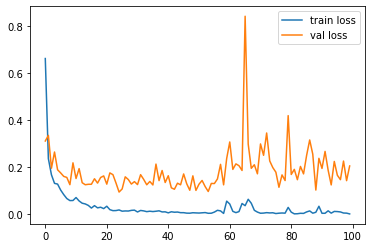

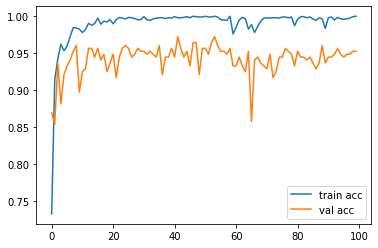

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r_vgg16.history['loss'], label='train loss')
plt.plot(r_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r_vgg16.history['accuracy'], label='train acc')
plt.plot(r_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
model_vgg16.save('model_cotton_class_vgg16.h5')

## 2. Resnet50

In [28]:
resNet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [29]:
# don't train existing weights
for layer in resNet50.layers:
    layer.trainable = False

In [30]:
x_resNet50 = Flatten()(resNet50.output)

In [31]:
prediction_resNet50 = Dense(len(folders), activation='softmax')(x_resNet50)

# create a model object
model_resNet50 = Model(inputs=resNet50.input, outputs=prediction_resNet50)

In [32]:
model_resNet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [33]:
# tell the model what cost and optimization method to use
model_resNet50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
t2 = time.clock()
print("Time now", (t2))

Time now 3694.840709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


In [35]:
r_resNet50 = model_resNet50.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 42s 638ms/step - loss: 4.1119 - accuracy: 0.3387 - val_loss: 1.5420 - val_accuracy: 0.5020
Epoch 2/20
61/61 [==============================] - 37s 602ms/step - loss: 1.1707 - accuracy: 0.5348 - val_loss: 0.8608 - val_accuracy: 0.7352
Epoch 3/20
61/61 [==============================] - 37s 607ms/step - loss: 1.0518 - accuracy: 0.6052 - val_loss: 0.8173 - val_accuracy: 0.5968
Epoch 4/20
61/61 [==============================] - 37s 605ms/step - loss: 1.1567 - accuracy: 0.5629 - val_loss: 0.7795 - val_accuracy: 0.7115
Epoch 5/20
61/61 [==============================] - 37s 605ms/step - loss: 0.9944 - accuracy: 0.6494 - val_loss: 0.6878 - val_accuracy: 0.7431
Epoch 6/20
61/61 [==============================] - 37s 604ms/step - loss: 0.8541 - accuracy: 0.6617 - val_loss: 0.9934 - val_accuracy: 0.6008
Epoch 7/20
61/61 [==============================] - 37s 602ms/step - loss: 0.7692 - accuracy: 0.6914 - val_loss: 1.2987 - val_accuracy: 0.5771

In [36]:
t3 = time.clock()
print("Time now", (t3))
print("Time elapsed: Resnet", round((t3 - t2)/60, 4), " minutes")

Time now 4454.510337
Time elapsed: Resnet 12.6612  minutes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


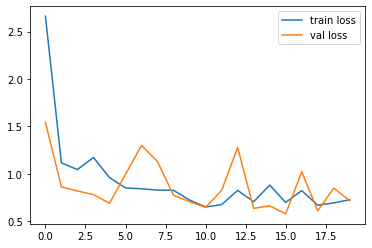

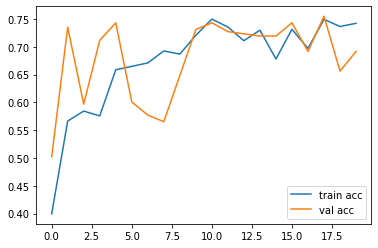

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r_resNet50.history['loss'], label='train loss')
plt.plot(r_resNet50.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r_resNet50.history['accuracy'], label='train acc')
plt.plot(r_resNet50.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
model_resNet50.save('model_cotton_class_resnet50.h5')

## 3. InceptionV3

In [39]:
inceptionV3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [40]:
# don't train existing weights
for layer in inceptionV3.layers:
    layer.trainable = False

In [41]:
x_inceptionV3 = Flatten()(inceptionV3.output)

In [42]:
prediction_inceptionV3 = Dense(len(folders), activation='softmax')(x_inceptionV3)

# create a model object
model_inceptionV3 = Model(inputs=inceptionV3.input, outputs=prediction_inceptionV3)

In [43]:
model_inceptionV3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [44]:
# tell the model what cost and optimization method to use
model_inceptionV3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [45]:
t4 = time.clock()
print("Time now", (t4))

Time now 4457.853976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


In [46]:
r_inceptionV3 = model_inceptionV3.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 45s 654ms/step - loss: 3.6856 - accuracy: 0.6185 - val_loss: 0.7852 - val_accuracy: 0.8617
Epoch 2/20
61/61 [==============================] - 37s 600ms/step - loss: 0.5886 - accuracy: 0.8971 - val_loss: 0.7995 - val_accuracy: 0.8854
Epoch 3/20
61/61 [==============================] - 37s 600ms/step - loss: 0.5617 - accuracy: 0.9054 - val_loss: 0.4063 - val_accuracy: 0.9051
Epoch 4/20
61/61 [==============================] - 36s 598ms/step - loss: 0.7170 - accuracy: 0.9072 - val_loss: 0.5782 - val_accuracy: 0.8972
Epoch 5/20
61/61 [==============================] - 36s 597ms/step - loss: 0.5583 - accuracy: 0.9282 - val_loss: 0.8859 - val_accuracy: 0.8893
Epoch 6/20
61/61 [==============================] - 37s 601ms/step - loss: 0.3862 - accuracy: 0.9333 - val_loss: 1.3490 - val_accuracy: 0.8617
Epoch 7/20
61/61 [==============================] - 36s 596ms/step - loss: 0.4414 - accuracy: 0.9325 - val_loss: 0.3784 - val_accuracy: 0.9368

In [47]:
t5 = time.clock()
print("Time now", (t5))
print("Time elapsed: InceptionV3", round((t5 - t4)/60, 4), " minutes")

Time now 5225.533574
Time elapsed: InceptionV3 12.7947  minutes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


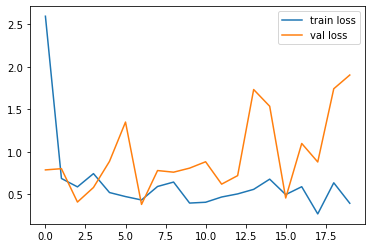

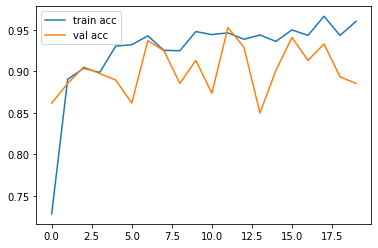

<Figure size 432x288 with 0 Axes>

In [48]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r_inceptionV3.history['loss'], label='train loss')
plt.plot(r_inceptionV3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r_inceptionV3.history['accuracy'], label='train acc')
plt.plot(r_inceptionV3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [49]:
model_inceptionV3.save('model_cotton_class_inceptionV3.h5')

## 4. InceptionResnetV2

In [50]:
inceptionResNetV2 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 1s 0us/step


In [51]:
# don't train existing weights
for layer in inceptionResNetV2.layers:
    layer.trainable = False

In [52]:
x_inceptionResNetV2 = Flatten()(inceptionResNetV2.output)

In [53]:
prediction_inceptionResNetV2 = Dense(len(folders), activation='softmax')(x_inceptionResNetV2)

# create a model object
model_inceptionResNetV2 = Model(inputs=inceptionResNetV2.input, outputs=prediction_inceptionResNetV2)

In [54]:
model_inceptionResNetV2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [55]:
# tell the model what cost and optimization method to use
model_inceptionResNetV2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [56]:
t6 = time.clock()
print("Time now", (t6))

Time now 5232.778624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


In [57]:
r_inceptionResNetV2 = model_inceptionResNetV2.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
61/61 [==============================] - 53s 717ms/step - loss: 2.4746 - accuracy: 0.6321 - val_loss: 1.9066 - val_accuracy: 0.7510
Epoch 2/25
61/61 [==============================] - 40s 649ms/step - loss: 0.8538 - accuracy: 0.8530 - val_loss: 1.1290 - val_accuracy: 0.8221
Epoch 3/25
61/61 [==============================] - 39s 645ms/step - loss: 0.5085 - accuracy: 0.8972 - val_loss: 0.5617 - val_accuracy: 0.9051
Epoch 4/25
61/61 [==============================] - 40s 648ms/step - loss: 0.4814 - accuracy: 0.8924 - val_loss: 0.8029 - val_accuracy: 0.8577
Epoch 5/25
61/61 [==============================] - 39s 644ms/step - loss: 0.3857 - accuracy: 0.9196 - val_loss: 1.3951 - val_accuracy: 0.7984
Epoch 6/25
61/61 [==============================] - 39s 644ms/step - loss: 0.3808 - accuracy: 0.9237 - val_loss: 0.4089 - val_accuracy: 0.9209
Epoch 7/25
61/61 [==============================] - 39s 641ms/step - loss: 0.3775 - accuracy: 0.9312 - val_loss: 0.7714 - val_accuracy: 0.8893

In [58]:
t7 = time.clock()
print("Time now", (t7))
print("Time elapsed: InceptionResNetV2", round((t7 - t6)/60, 4), " minutes")

Time now 6340.51636
Time elapsed: InceptionResNetV2 18.4623  minutes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


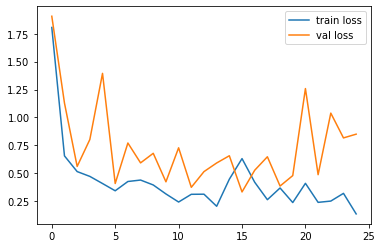

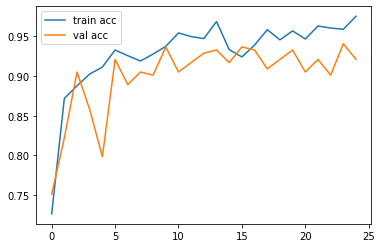

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r_inceptionResNetV2.history['loss'], label='train loss')
plt.plot(r_inceptionResNetV2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r_inceptionResNetV2.history['accuracy'], label='train acc')
plt.plot(r_inceptionResNetV2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [60]:
model_inceptionResNetV2.save('model_cotton_class_inceptionResNetV2.h5')